**Цель:** изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

**Описание задания:**
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

# **Этапы работы:**



---



---



---



# ***Получите данные и загрузите их в рабочую среду***


In [1]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1-Homework-1-1/main/adult.csv', delimiter=',')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K




---



---



---



# ***Проведите первичный анализ***

Чтобы посмотреть общую информацию по датафрейму и всем признакам применим info:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Мы видим 2 вида признаков int64  и  object

Посмотрим на размер данных

In [4]:
data.shape

(48842, 15)

Видим, что в таблице 48842 строки и 15 столбцов

Выведем названия столбцов:

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Посмотрим все возможные значения в колонках и распределение по выборке:

In [7]:
data['age'].value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [8]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [9]:
data['fnlwgt'].value_counts()

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64

In [10]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [11]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [12]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [13]:
data['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [14]:
data['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [15]:
data['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [16]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

Мы можем видеть, что "?" встречаются в колонках workclass, occupation, native-country

Посмотрим распределение income по выборке. Для этого воспользуемся value_counts:



In [17]:
data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Видно, что в нашей выборке <=50K 37155 строк, а >50K 11687 строк

И распределение по выборке:

In [18]:
data['income'].value_counts(normalize=True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

Распределение по выборке говорит нам, что <=50K 76,0718% строк, а >50K 23,9282% строк

Рассмотрим распределение по выборкам income:

In [19]:
income1 = data['income'].value_counts(normalize=True)
income1


income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64



---



---



---



# ***Проверьте данные на пропуски. Удалите в случае обнаружения. Предложите альтернативный способ работы с пропусками***

В первичном анализе пропусков данных обнаружено не было. Если бы были обнаружены есть 2 пути: удалить строки с данными типа NaN, второй вариант заполнить пропуски

In [20]:
pd.isnull(data)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Однако, мы видим данные "?" и "0". Но значения "0" вполне обьяснимы, так как они принадлежат к колонкам capital-gain и capital-loss

Из общего анализа мы видим, что "?" встречаются в колонках workclass, occupation, native-country

Попробуем "почистить" "?" в выборке:

In [21]:
data.replace(['?'], [None], inplace=True)
data.dropna(inplace=True)
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [22]:
data.shape

(45222, 15)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [24]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Теперь видно, что из data где 48842 строки и 15 столбцов в data2 попали только 45222 строки. Количество колонок осталось прежним - 15

Рассмотрим распределение по выборкам income:

In [25]:
income2 = data['income'].value_counts(normalize=True)
income2

income
<=50K    0.752156
>50K     0.247844
Name: proportion, dtype: float64

Распределение немного меняется по выборке общей и выборке "очищенной" от строк со знаком "?". 


1.   Общая - <=50K 0.760718, а в "очищенной" 0.752156
2.   Общая - >50K 0.239282, а в "очищенной" 0.247844



Можно порассуждать от чего конкретно будет зависеть доход. Или попробовать посмотреть с помощью корреляции. Но для этого нам нужно преобразовать строки в формат int64. После этого будем использовать корреляцию Пирсона. 

1.   Коэф. -1 указывает на совершенно отрицательную линейную корреляцию между двумя переменные
2.   Коэф. 0 указывает на отсутствие линейной корреляции между двумя переменными
3.   Коэф. 1 указывает на совершенно положительную линейную корреляцию между двумя переменными

Чем дальше коэффициент корреляции от нуля, тем сильнее Связь между двумя переменными. Поэтому будем рассматривать значения от 0.5 до 1 значимой корреляцией.

In [36]:
data['income'].corr(data['age'])

0.23704023512371114

Зависимость между income и age: 0,23704. Значение меньше 0,5 мы принимаем как не значимую корреляцию.



In [37]:
data['income'].corr(data['workclass'])

0.13775567073594322

Зависимость между income и workclass: 0,13776. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [38]:
data['income'].corr(data['educational-num'])

0.3327998791762594

Зависимость между income и educational-num: 0,3328. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [39]:
data['income'].corr(data['marital-status'])

-0.02975735169568599

Зависимость между income и marital-status: -0,02976. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [40]:
data['income'].corr(data['occupation'])

0.0426007040253431

Зависимость между income и occupation: 0,042601. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [41]:
data['income'].corr(data['relationship'])

-0.06742706419526144

Зависимость между income и relationship: -0,06743. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [42]:
data['income'].corr(data['race'])

0.040551853648008625

Зависимость между income и race: 0,04055. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [43]:
data['income'].corr(data['gender'])

-0.21576045786566447

Зависимость между income и gender: -0,21576. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [44]:
data['income'].corr(data['capital-gain'])

0.2210338063545209

Зависимость между income и capital-gain: 0,22103. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [45]:
data['income'].corr(data['capital-loss'])

0.148686989247049

Зависимость между income и capital-loss: 0,14869. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [46]:
data['income'].corr(data['hours-per-week'])

0.2271991420181105

Зависимость между income и hours-per-week: 0,2272. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

In [47]:
data['income'].corr(data['native-country'])

-0.0008519152290608379

Зависимость между income и native-country: -0,00085. Значение меньше 0,5 мы принимаем как не значимую корреляцию.

Вывод: Значимых корреляций (больше 0.5) в данной выборке нет, однако есть некоторая зависимость между income и age, educational, capital-gain, hours-per-week (положительная и более 0.2) и gender(отрицательная и более 0.2)

Исходя из этого мы говорим о вероятной прямой зависимости между income и age, educational, capital-gain, hours-per-week: выше доход, выше и возраст, образование, прирост капитала и часов работы в меделю. И вероятной обратной зависимости income и gender, а так как gender 0-Male 1-Female, то получаем: больший доход соответствует мужчинам.

исходя из этого мы можем построить несколько графиков:



---



---



---



# ***Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)***

Построим график доход/рабочие часы в неделю

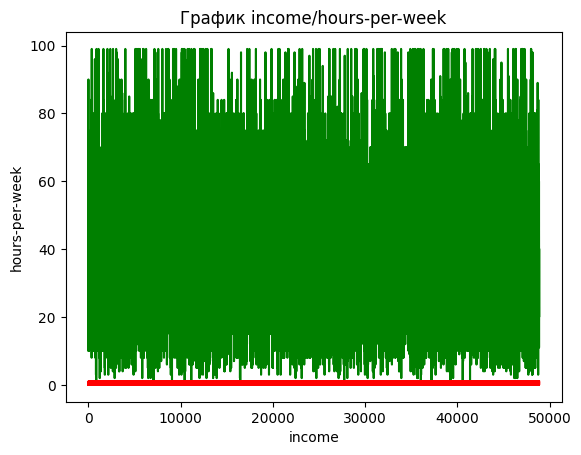

In [ ]:
x = data['income']
y = data['hours-per-week']

plt.title("График income/hours-per-week")
plt.xlabel("income")
plt.ylabel("hours-per-week")
plt.plot(y, color ="green")
plt.plot(x, color ="red")
plt.show()

На самом деле, абсолютно не информативный график.

Попробуем взять другие данные: возраст и рабочие часы в неделю.

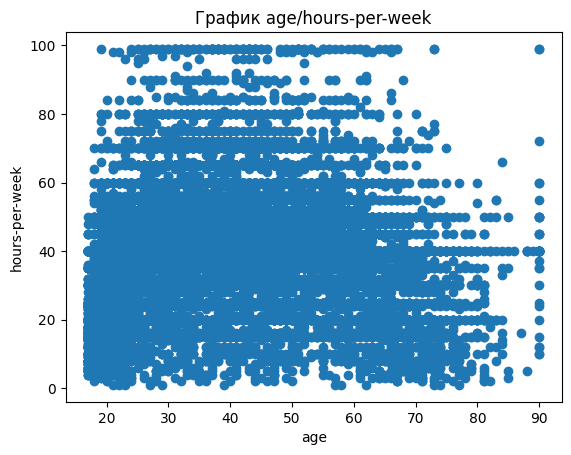

In [ ]:
x = data['age']
y = data['hours-per-week']

plt.title("График age/hours-per-week")
plt.xlabel("age")
plt.ylabel("hours-per-week")
plt.scatter(x, y)
plt.show()

Тут внешне на него посмотрев, мы можем сказать:


1.   Чем меньше возраст, тем больше часов в неделю
2.   Чем больше возраст, тем меньше часов в неделю



Можно еще посмотреть график возраста и прирост капитала

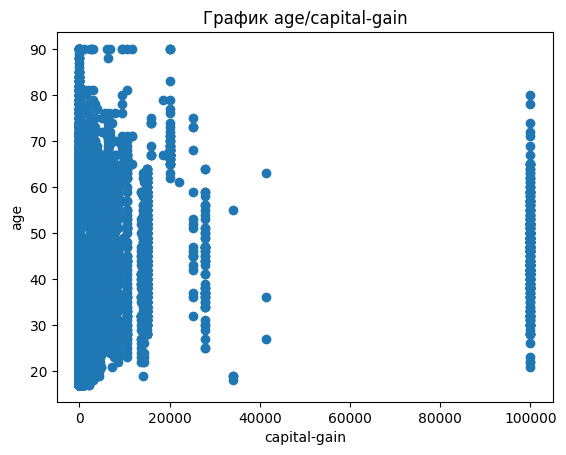

In [ ]:
y = data['age']
x = data['capital-gain']

plt.title("График age/capital-gain")
plt.ylabel("age")
plt.xlabel("capital-gain")
plt.scatter(x, y)
plt.show()

У Большого количества людей прирост капитала составляет до 20.000, и чаще откладывают люди от 20 до 70 лет

Это характеризует выборку, но не влияет на нашу конечную цель.



---



---



---



# ***Преобразуйте категориальные признаки.***

income

In [27]:
data['income'] = pd.factorize(data['income'])[ 0 ]

workclass

In [28]:
data['workclass'] = pd.factorize(data['workclass'])[ 0 ]

marital-status

In [29]:
data['marital-status'] = pd.factorize(data['marital-status'])[ 0 ]

occupation

In [30]:
data['occupation'] = pd.factorize(data['occupation'])[ 0 ]

relationship

In [31]:
data['relationship'] = pd.factorize(data['relationship'])[ 0 ]

race

In [32]:
data['race'] = pd.factorize(data['race'])[ 0 ]

gender

In [33]:
data['gender'] = pd.factorize(data['gender'])[ 0 ]

native-country

In [34]:
data['native-country'] = pd.factorize(data['native-country'])[ 0 ]

Проверка (визуальная) таблицы

In [35]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,11th,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,HS-grad,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,Assoc-acdm,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,Some-college,10,1,0,1,0,0,7688,0,40,0,1
5,34,0,198693,10th,6,0,3,2,1,0,0,0,30,0,0




---



---



---



# ***Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.***

In [48]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 36178
No. of testing examples: 9044




---



---



---



# ***Обучите модели логистической регрессии и опорных векторов на обучающем множестве.***

Я взяла только столбцы со значимой корреляцией.

In [49]:
selectedColumns_1 = data[['age', 'educational-num', 'capital-gain', 'hours-per-week', 'gender']]
selectedColumns_2 = data.loc[:, data.columns != 'income']

In [50]:
X1 = pd.get_dummies(selectedColumns_1, columns=['age', 'educational-num', 'capital-gain', 'hours-per-week', 'gender'])
y1 = data[data.columns[-1]]
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, stratify=y1)

Обучим модель логистической регрессии

In [51]:
l_model_1 = LogisticRegression(max_iter=36178)
l_model_1.fit(X1_train, y1_train)

LogisticRegression(max_iter=36178)

Обучим модель опорных векторов

In [52]:
clf_model_1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_model_1.fit(X1_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])



---



---



---



# ***Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.***

Рассмотрим модель, обученную не на полной выборке, а только с самой высокой корреляцией по выборке.

Для логистической регрессии

In [53]:
l_predictions_1 = l_model_1.predict(X1_val)

In [ ]:
l_model_1.score(X1_train, y1_train)

0.8361389833319512

In [ ]:
l_model_1.score(X1_val, y1_val)

0.8323935876174682

Для опорных векторов

In [ ]:
clf_predictions_1 = clf_model_1.predict(X1_val)

In [ ]:
clf_model_1.score(X1_train, y1_train)

0.8280951986068497

In [ ]:
clf_model_1.score(X1_val, y1_val)

0.825428413488115

Вывод. Разница между показателями менее 0.01, что на мой вгляд не весомая разница. 



---



---



---



# **Сформулируйте выводы по проделанной работе.**

Я рассмотрела методы общего анализа выборки, поиск и удаление "пустых" строк (на самом деле они не пустые с точки зрения значения в ячейке, они пустые для анализа) поиск корреляции с другими данными, построила по данным графики, преобразовала признаки, обучила модель двумя способами и сравнила итоги.

# **Кратко опишите какие преобразования были сделаны с данными.**

Первое преобразование было сделано "очистка" - из данных были убраны строки с "?".

Второе преобразование было после "очистки" данных - преобразование категориальных признаков для проверки корреляции и для обучения модели.

# ***Сравните точность двух моделей***

Разница между показателями менее 0.01, что на мой вгляд не весомая разница, а значит что точность двух моделей находится примерно на одном уровне. 

# ***Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. Что по вашему мнению нужно сделать, чтобы улучшить результат?***

Результат предсказалия в обоих моделей неплохой, на мой взгляд с поставленной задачей модели справились.

Для улучшения результата можно:


1.   Взять для обучения более репрезентативную выборку с большим количеством данных 
2.   Можно попробовать обучить модель без ограничения набора данных (по полной выборке)

